We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.

Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

Our aim is to identify;

* Dominant Major_category for Men and Women
* Top Majors in Dominant category according to the highest Employment
* Top Majors in Dominant category according to highest Median Salary

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset
jobs = pd.read_csv('jobs.csv')

In [3]:
#check the first five rows of the dataframe
jobs.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [5]:
jobs.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

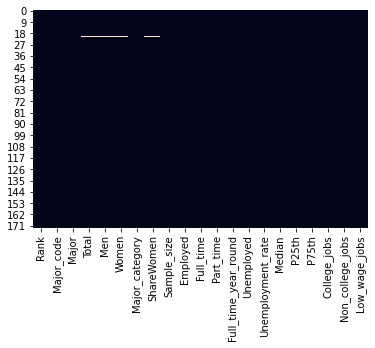

In [6]:
#lets check where the data is missing in our data by visualizing it using heat map
sns.heatmap(jobs.isnull(), cbar = False)
plt.show()

In [7]:
jobs[jobs['Men'].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [8]:
jobs.dropna(axis = 'index',inplace= True)

In [9]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

In [10]:
print(jobs['Major_category'].unique())
len(jobs['Major_category'].unique())

['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Industrial Arts & Consumer Services' 'Arts'
 'Health' 'Social Science' 'Biology & Life Science' 'Education'
 'Agriculture & Natural Resources' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary']


16

In [11]:
dominant = jobs.groupby('Major_category')[['Men','Women']].mean()

In [12]:
dominant

,Men,Women
Major_category,,
Agriculture & Natural Resources,4484.111111,3918.111111
Arts,16798.750000,27842.500000
Biology & Life Science,13208.500000,19210.214286
Business,51373.230769,48809.538462
Communications & Journalism,32980.250000,65170.000000
Computers & Mathematics,18975.000000,8207.545455
Education,6470.375000,28475.187500
Engineering,14079.551724,4457.793103
Health,6293.083333,32309.416667


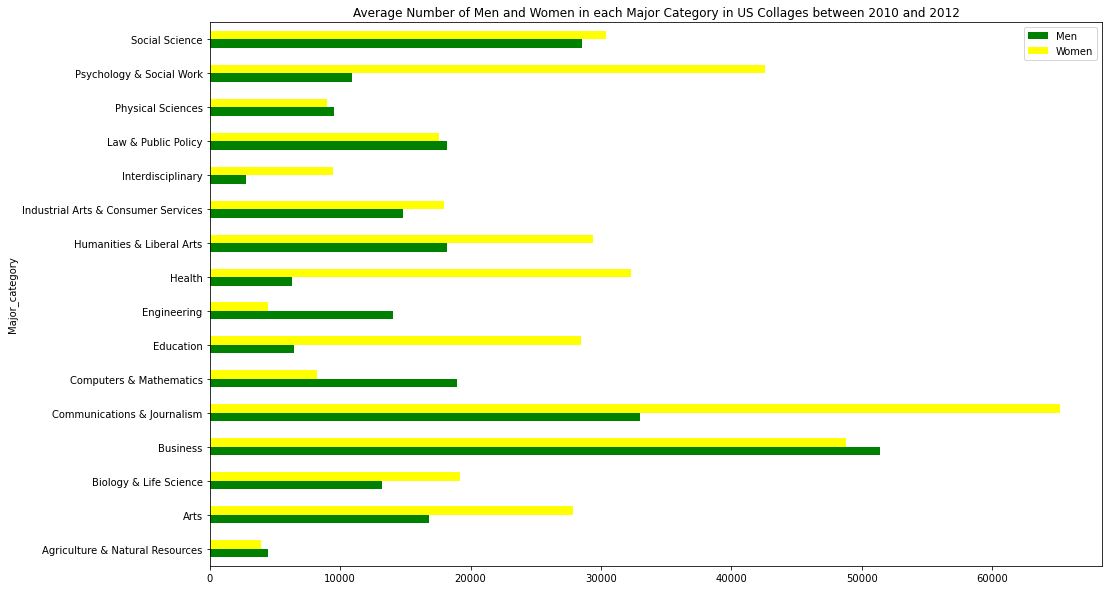

In [13]:
dominant.plot.barh(title = "Average Number of Men and Women in each Major Category in US Collages between 2010 and 2012",\
                   figsize = (16,10), color = ["green","yellow"])
plt.show()

The barplot shows that women are dominating most of the major categories in US Collages between 2010 and 2012.

In [14]:
def dom(row):
    men = row['Men']
    women = row['Women']
    if(men > women):
        return 'Men'
    else:
        return 'Women'
    
dominant.apply(dom, axis = 1)


Major_category
Agriculture & Natural Resources          Men
Arts                                   Women
Biology & Life Science                 Women
Business                                 Men
Communications & Journalism            Women
Computers & Mathematics                  Men
Education                              Women
Engineering                              Men
Health                                 Women
Humanities & Liberal Arts              Women
Industrial Arts & Consumer Services    Women
Interdisciplinary                      Women
Law & Public Policy                      Men
Physical Sciences                        Men
Psychology & Social Work               Women
Social Science                         Women
dtype: object

In [15]:
dominant["Dominant_Gender"] = dominant.apply(dom, axis = 1)

In [16]:
dominant

,Men,Women,Dominant_Gender
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Arts,16798.750000,27842.500000,Women
Biology & Life Science,13208.500000,19210.214286,Women
Business,51373.230769,48809.538462,Men
Communications & Journalism,32980.250000,65170.000000,Women
Computers & Mathematics,18975.000000,8207.545455,Men
Education,6470.375000,28475.187500,Women
Engineering,14079.551724,4457.793103,Men
Health,6293.083333,32309.416667,Women


In [17]:
gender_group = dominant.groupby("Dominant_Gender")
gender_group.groups

{'Men': Index(['Agriculture & Natural Resources', 'Business',
        'Computers & Mathematics', 'Engineering', 'Law & Public Policy',
        'Physical Sciences'],
       dtype='object', name='Major_category'),
 'Women': Index(['Arts', 'Biology & Life Science', 'Communications & Journalism',
        'Education', 'Health', 'Humanities & Liberal Arts',
        'Industrial Arts & Consumer Services', 'Interdisciplinary',
        'Psychology & Social Work', 'Social Science'],
       dtype='object', name='Major_category')}

In [18]:
men_df = gender_group.get_group("Men")
men_df

,Men,Women,Dominant_Gender
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Business,51373.230769,48809.538462,Men
Computers & Mathematics,18975.000000,8207.545455,Men
Engineering,14079.551724,4457.793103,Men
Law & Public Policy,18225.800000,17595.600000,Men
Physical Sciences,9539.000000,9008.900000,Men


In [19]:
women_df = gender_group.get_group("Women")
women_df

,Men,Women,Dominant_Gender
Major_category,,,
Arts,16798.750000,27842.500000,Women
Biology & Life Science,13208.500000,19210.214286,Women
Communications & Journalism,32980.250000,65170.000000,Women
Education,6470.375000,28475.187500,Women
Health,6293.083333,32309.416667,Women
Humanities & Liberal Arts,18189.733333,29374.800000,Women
Industrial Arts & Consumer Services,14825.857143,18001.571429,Women
Interdisciplinary,2817.000000,9479.000000,Women
Psychology & Social Work,10901.666667,42543.555556,Women


In [20]:
men_cat = men_df.index
men_cat = list(men_cat)
men_cat

['Agriculture & Natural Resources',
 'Business',
 'Computers & Mathematics',
 'Engineering',
 'Law & Public Policy',
 'Physical Sciences']

In [21]:
women_cat = women_df.index
women_cat = list(women_cat)
women_cat

['Arts',
 'Biology & Life Science',
 'Communications & Journalism',
 'Education',
 'Health',
 'Humanities & Liberal Arts',
 'Industrial Arts & Consumer Services',
 'Interdisciplinary',
 'Psychology & Social Work',
 'Social Science']

In [22]:
men_majors_bol = jobs["Major_category"].isin(men_cat)
men_majors_bol

0       True
1       True
2       True
3       True
4       True
       ...  
168    False
169    False
170    False
171    False
172    False
Name: Major_category, Length: 172, dtype: bool

In [23]:
women_majors_bol = jobs["Major_category"].isin(women_cat)
women_majors_bol

0      False
1      False
2      False
3      False
4      False
       ...  
168     True
169     True
170     True
171     True
172     True
Name: Major_category, Length: 172, dtype: bool

In [24]:
men_majors = jobs[men_majors_bol]
women_majors = jobs[women_majors_bol]
print(men_majors.shape)
print(women_majors.shape) 

(77, 21)
(95, 21)


In [25]:
men_majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [26]:
women_majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
26,27,5601,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
32,33,6099,MISCELLANEOUS FINE ARTS,3340.0,1970.0,1370.0,Arts,0.410180,30,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.355469,1322,104117,...,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653
44,45,6105,MEDICAL TECHNOLOGIES TECHNICIANS,15914.0,3916.0,11998.0,Health,0.753927,190,13150,...,2665,9005,505,0.036983,45000,36000,50000,5546,7176,1002


In [27]:
m=men_majors["Major_category"].unique()
pd.Series(sorted(m)).equals(pd.Series(men_cat))

True

In [28]:
w=women_majors["Major_category"].unique()
pd.Series(sorted(w)).equals(pd.Series(women_cat))

True

In [29]:
emp_men_maj = men_majors.sort_values(["Employed"], ascending = False)
emp_men_maj.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910


In [30]:
emp_men_maj.groupby("Major_category")["Employed"].max()

Major_category
Agriculture & Natural Resources     17112
Business                           276234
Computers & Mathematics            102087
Engineering                         76442
Law & Public Policy                125393
Physical Sciences                   48535
Name: Employed, dtype: int64

In [31]:
m_category  = emp_men_maj.groupby("Major_category")[["Major","Employed","Median"]].first()
m_category

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,ANIMAL SCIENCES,17112,30000
Business,BUSINESS MANAGEMENT AND ADMINISTRATION,276234,38000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,MECHANICAL ENGINEERING,76442,60000
Law & Public Policy,CRIMINAL JUSTICE AND FIRE PROTECTION,125393,35000
Physical Sciences,CHEMISTRY,48535,39000


In [32]:
sal_men_maj = men_majors.sort_values(["Median"], 
                                     ascending = False)

In [33]:
s_m_category  = sal_men_maj.groupby("Major_category")[["Major", 
                                                    "Employed",
                                                    "Median"]].first()
s_m_category

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,8884,40000
Business,ACTUARIAL SCIENCE,2912,62000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,PETROLEUM ENGINEERING,1976,110000
Law & Public Policy,COURT REPORTING,930,54000
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1526,62000


In [34]:
cols = ["Employed","Median"]

normalize_men = s_m_category.copy()

for c in cols:
    normalize_men[c] = normalize_men[c]*100/normalize_men[c].sum()

In [35]:
normalize_men

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,7.508769,10.498688
Business,ACTUARIAL SCIENCE,2.461226,16.272966
Computers & Mathematics,COMPUTER SCIENCE,86.284072,13.910761
Engineering,PETROLEUM ENGINEERING,1.670118,28.871391
Law & Public Policy,COURT REPORTING,0.786037,14.173228
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1.289777,16.272966


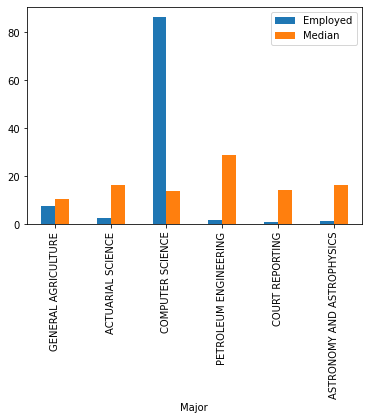

In [36]:
normalize_men.set_index("Major").plot.bar()
plt.show()

Our Analysis shows that in Men dominant categories, Computer Science has most number of jobs with average annual salaries while Petroleum Engineering has less jobs but are highest paid.